In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from matplotlib import pyplot as plt

In [2]:
content_image_path = '/Users/alex/Desktop/Projects/NeuralStyleTransfer/Timisoara_0.jpg'
style_image_path  = '/Users/alex/Desktop/Projects/NeuralStyleTransfer/starry-night-1093721_1280.jpg'

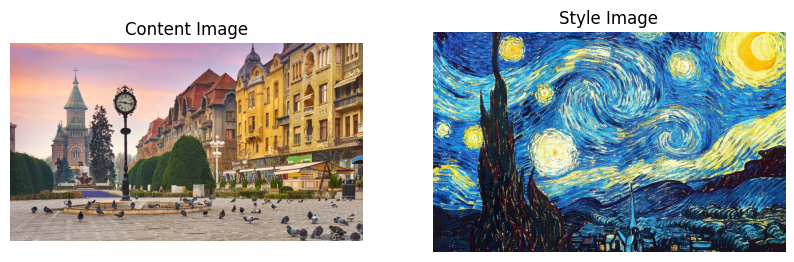

In [3]:
def preprocess_images(content_image_path, style_image_path):
    content_image = plt.imread(content_image_path)
    style_image = plt.imread(style_image_path)
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(content_image)
    axs[0].axis('off')
    axs[0].set_title('Content Image')
    axs[1].imshow(style_image)
    axs[1].axis('off')
    axs[1].set_title('Style Image')
    content_image = content_image.astype(np.float32)[np.newaxis, ...]/255.
    style_image = style_image.astype(np.float32)[np.newaxis, ...]/255.
    content_image = tf.image.resize(content_image, (256, 256))
    style_image = tf.image.resize(style_image, (256, 256))
    return content_image, style_image

content_image, style_image = preprocess_images(content_image_path, style_image_path)

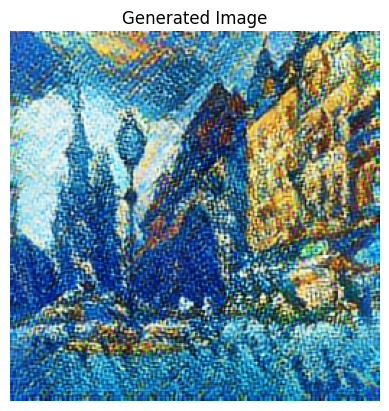

In [4]:
def generate_image(content_image, style_image):
    nst = hub.load('https://kaggle.com/models/google/arbitrary-image-stylization-v1/frameworks/TensorFlow1/variations/256/versions/1')
    outputs = nst(tf.constant(content_image), tf.constant(style_image))
    plt.imshow(tf.squeeze(outputs[0]))
    plt.axis('off')
    plt.title('Generated Image')

generate_image(content_image, style_image)